### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
* y_score : Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_y_df=pd.read_csv('./datasets/titanic_gender_submission.csv')
train = train_df[['Pclass' , 'Sex' , 'Age' ,'Survived']]
test = test_df[['Pclass' , 'Sex' , 'Age' ]]
test_y = test_y_df['Survived']

In [5]:
train = train.dropna(axis=0)

# Sex labelencding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex']=data

# Age Scaling
scaler = MinMaxScaler()
scaler.fit(train[['Age']])
data = scaler.transform(train[['Age']])

train['Age']= data

X = train.drop('Survived' ,axis=1)
y = train['Survived']
lr = LogisticRegression()

lr.fit(X , y)

LogisticRegression()

In [6]:
# test data preprocessing
test = test.fillna(np.mean(test['Age']))

# Sex labelencding
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex']=data

# Age Scaling
scaler = MinMaxScaler()
scaler.fit(test[['Age']])
data = scaler.transform(test[['Age']])

test['Age']= data

pred_proba = lr.predict_proba(test)

In [8]:
from sklearn.metrics import roc_curve

fpr , tpr , threshosd = roc_curve(test_y ,pred_proba[: , 1] )

In [14]:
from  sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X ,y)
dt_pred_proba = dt.predict_proba(test)
dt_fpr , dt_tpr , dt_threshosd = roc_curve(test_y ,dt_pred_proba[: , 1] )

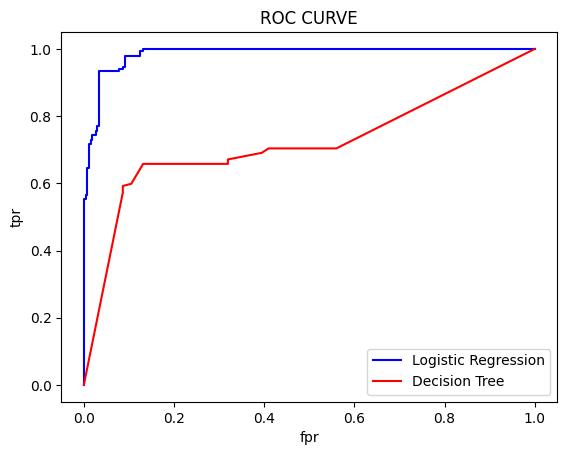

In [15]:
import matplotlib.pyplot as plt

plt.title("ROC CURVE")

plt.xlabel("fpr"   )
plt.ylabel("tpr")

plt.plot(fpr, tpr , "b", label = "Logistic Regression" )
plt.plot(dt_fpr, dt_tpr , "r", label = "Decision Tree" )

plt.legend(loc = "lower right")

plt.show()